# Model Training on Algerian Forest Dataset and mlr , Lasso and ridge

## 1. Import Prerequisite Library

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2.Import the Dataset

In [351]:
df = pd.read_csv('C:/Users/Pritam/PWskills resource ML master/cleaned_Algerian Forest Fires Dataset.csv')

In [352]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


## 3.Feature Engineering

##### Here we not performed tha tmuch FE on this dataset because we already done FE on this dataset and this is cleaned dataset that we perfromed in EDA And FE Algerian Forest Fires Dataset_ME

### 1.Head

In [353]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#### Insights : First Five records of the dataset

### 2. Tail

In [354]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


#### Tail : Last Five records of the dataset

#### 3.Drop the columns (day , month , year)

In [355]:
df = df.drop(['day' , 'month' , 'year'] , axis = 1)

In [356]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


### 3.shape

In [357]:
df.shape

(243, 12)

#### Insights : Dataframe contains 243 records ansd 12 columns

### 4. columns

In [358]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

### 5.Unique values of dataframe

In [359]:
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          8
Region           2
dtype: int64

### 6.count of categorical column

In [360]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [361]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire' , 'fire'),0,1)

In [362]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

#### Insights : Now categorical column of the dataframe has only two categories which is fire and not fire and it is imbalanced dataset because count of the not fire is 106 and fire is 137.

### 7.Correleation

In [363]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


### 8.Correleation with help of Heatmap

<AxesSubplot:>

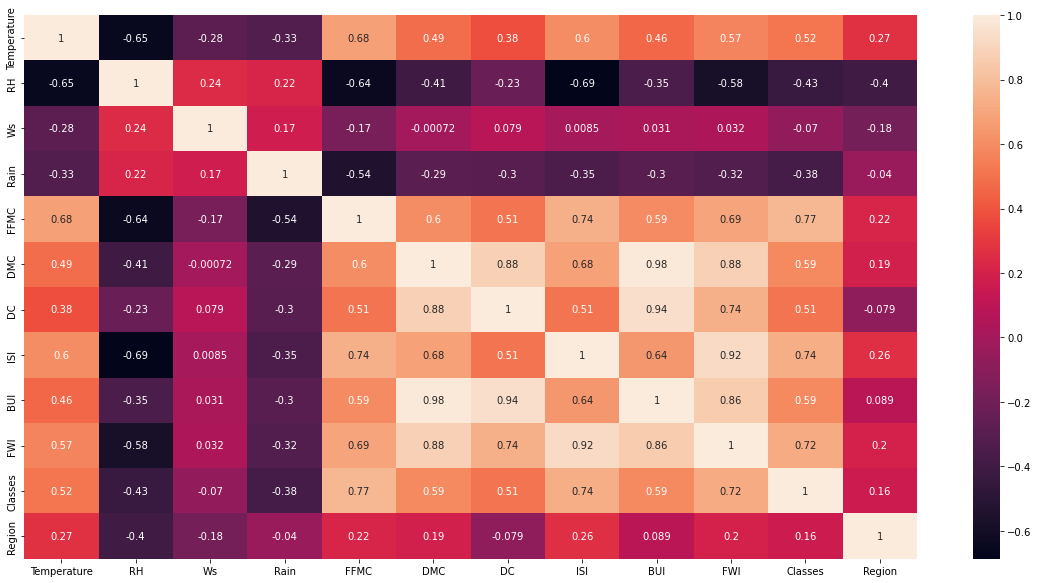

In [364]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.corr() , annot = True)

## Feature Selection by correleation

In [365]:
x = df.drop('FWI' , axis = 1)

In [366]:
def correleation(dataset , threshold):
    
    corr_col = set()
    
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix)):
        
        for j in range(i) :
            
            if abs(corr_matrix.iloc[i,j]) > threshold:
                
                columname = corr_matrix.columns[i]
                
                corr_col.add(columname)
                
    return corr_col
        
        
correleation(x , 0.85)

{'BUI', 'DC'}

#### Insights : we perform here Feature selection by correleation . We get these three columns are not higly correleated to output variable. columns name are : BUI , DC .

### Drop those columns

In [367]:
x.drop(['BUI','DC'],axis = 1 , inplace = True)

In [368]:
#x.drop(['BUI','DC'] , axis = 1 , inplace = True)

In [369]:
x.shape

(243, 9)

In [370]:
x.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0


In [371]:
y.head(2)

,FWI
0,0.5
1,0.4


#### Insights : shape after the drop the columns are x has 243 records and 9 columns

## 4.Train the model

In [372]:
#x = df.drop('FWI' , axis = 1)
y = df[['FWI']]

In [373]:
x.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0


In [374]:
y.head(2)

,FWI
0,0.5
1,0.4


In [375]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 3 , random_state = 42)

In [376]:
x_train.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


In [377]:
x_test.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0


In [378]:
y_train.head(2)

,FWI
232,3.8
238,6.5


In [379]:
y_test.head(2)

,FWI
24,8.4
6,7.2


In [380]:
x_train.shape , x_test.shape

((240, 9), (3, 9))

#### Insights : shape after the drop the columns are x has 240 records and 9 columns and y has 3 records and 1 column

### 1.Correleation

In [381]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
Temperature,1.000000,-0.654523,-0.281465,-0.324760,0.676706,0.484087,0.602754,0.515551,0.276475
RH,-0.654523,1.000000,0.244168,0.223068,-0.647728,-0.411616,-0.688751,-0.434840,-0.406084
Ws,-0.281465,0.244168,1.000000,0.168030,-0.160983,0.001252,0.013373,-0.062502,-0.191033
Rain,-0.324760,0.223068,0.168030,1.000000,-0.541877,-0.287779,-0.345210,-0.375796,-0.046476
FFMC,0.676706,-0.647728,-0.160983,-0.541877,1.000000,0.604704,0.739055,0.767471,0.234178
DMC,0.484087,-0.411616,0.001252,-0.287779,0.604704,1.000000,0.680608,0.587542,0.195778
ISI,0.602754,-0.688751,0.013373,-0.345210,0.739055,0.680608,1.000000,0.734646,0.271513
Classes,0.515551,-0.434840,-0.062502,-0.375796,0.767471,0.587542,0.734646,1.000000,0.176383
Region,0.276475,-0.406084,-0.191033,-0.046476,0.234178,0.195778,0.271513,0.176383,1.000000


<AxesSubplot:>

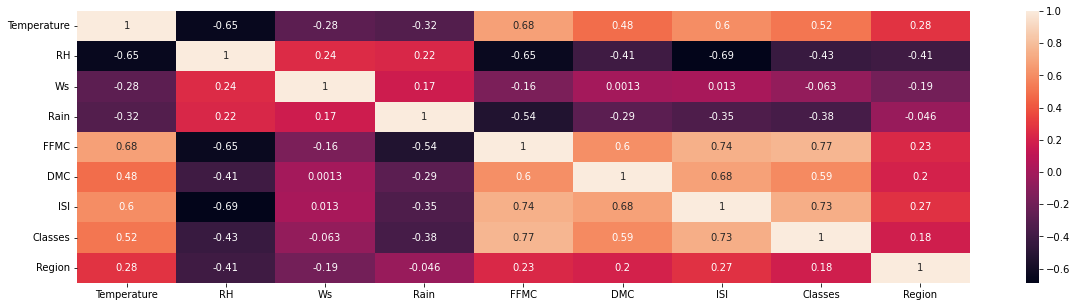

In [382]:
plt.figure(figsize = ( 20 , 5))
corr = x_train.corr()
sns.heatmap(corr , annot = True)

## Feature Scaling or StanderdScaler

In [383]:
from sklearn.preprocessing import StandardScaler

In [384]:
scaler = StandardScaler()

In [385]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [386]:
x_train_scaled

array([[ 0.50362088, -0.27445662, -0.88704342, ..., -0.63559825,
        -1.13389342,  1.        ],
       [-0.5976913 ,  0.19604044, -0.5316337 , ..., -0.05914637,
         0.8819171 ,  1.        ],
       [ 1.88026111,  0.12882658, -2.30868228, ..., -0.87578654,
        -1.13389342,  1.        ],
       ...,
       [-1.97433152,  0.93539297,  0.53459545, ..., -1.091956  ,
        -1.13389342, -1.        ],
       [ 0.50362088, -0.20724275,  0.17918573, ...,  0.63739967,
         0.8819171 ,  1.        ],
       [-0.5976913 ,  1.00260683,  1.95623431, ..., -0.87578654,
        -1.13389342, -1.        ]])

In [387]:
x_train.shape , y_train.shape

((240, 9), (240, 1))

In [388]:
x_test.shape , y_test.shape

((3, 9), (3, 1))

#### Insights : x_train has 240  records and 9 columns and y_train has 240 records and 1 columns

#### Insights : x_train has 3 records and 9 columns and y_train has 3 records and 1 columns

### Boxplot

Text(0.5, 1.0, 'Boxplot after the Feature scaling or standerdization')

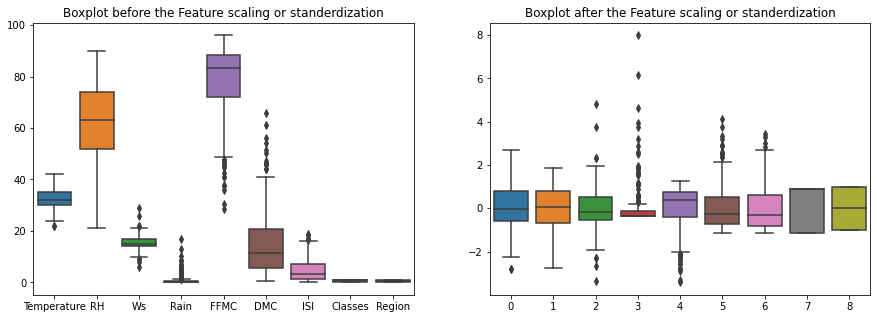

In [391]:
plt.figure(figsize = (15 , 5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('Boxplot before the Feature scaling or standerdization')


plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('Boxplot after the Feature scaling or standerdization')

#### Insights : Here we see data before the feature scaling is most diverse data and after feature scaling that data is into fixed range

## Multiple Linear Regression Model

In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [393]:
regressor = LinearRegression()

In [394]:
regressor.fit(x_train_scaled , y_train)

LinearRegression()

In [395]:
#regressor.fit(x_test_scaled , y_test)

In [396]:
y_pred = regressor.predict(x_test_scaled)

In [397]:
y_pred

array([[ 8.21992432],
       [ 7.75712647],
       [-0.32034528]])

### Mean Squared Error

In [398]:
mse = mean_squared_error(y_test , y_pred)

In [399]:
mse

0.3385945120764768

#### Insights : Mean Squared Error of LinearRegression is 0.3385945120764768

### Mean Absolute Error

In [400]:
mae = mean_absolute_error(y_test , y_pred)

In [401]:
mae 

0.5191824779808879

#### Insights : Mean Absolute Error of LinearRegression is 0.5191824779808879

### R2 score

In [402]:
r2_score = r2_score(y_test , y_pred)

In [403]:
r2_score 

0.9719758082702934

#### Insights : R2_score of LinearRegression is 0.9719758082702934

### Root Mean Squared Error

In [404]:
rmse = np.sqrt(mse)

In [405]:
rmse

0.5818887454457912

#### Insights : Root Mean Squared of LinearRegression is 0.5818887454457912

# Lasso regression

In [406]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [407]:
lasso = Lasso()

In [408]:
lasso.fit(x_train_scaled , y_train)

Lasso()

In [409]:
y_pred_lasso = lasso.predict(x_test_scaled)

In [410]:
y_pred_lasso

array([7.83403301, 7.51159188, 1.04672986])

### Mean Squared Error

In [411]:
mse = mean_squared_error(y_test , y_pred_lasso)

In [412]:
mse

0.23877389045551348

#### Insights : Mean Squared Error of Lasso Regression is 0.23877389045551348

### Mean Absolute Error

In [413]:
mae = mean_absolute_error(y_test , y_pred_lasso)

In [414]:
mae

0.47476290983898234

#### Mean Absolute Error of Lasso Regression is 0.47476290983898234

### R2 Score

In [415]:
r2_score(y_test , y_pred_lasso)

0.9802375849356297

#### R2 Score of Lasso Regression is 0.9802375849356297

### Root Mean Squared Error

In [416]:
rmse = np.sqrt(mse)

In [417]:
rmse

0.48864495337157987

#### Insights : RMSE of Lasso Regression is 0.48864495337157987

## Ridge Regression

In [418]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [419]:
ridge = Ridge()

In [420]:
ridge.fit(x_train_scaled , y_train)

Ridge()

In [421]:
y_pred_ridge = ridge.predict(x_test_scaled)

In [422]:
y_pred_ridge

array([[ 8.22913065],
       [ 7.7684008 ],
       [-0.28686761]])

### Mean Squared Error

In [423]:
mse = mean_squared_error(y_test , y_pred_ridge)

In [424]:
mse

0.3238121453797279

#### Insights : Mean Squared Error of Ridge Regression is 0.3238121453797279

### Mean Absolute Error

In [425]:
mae = mean_absolute_error(y_test , y_pred_ridge)

In [426]:
mae

0.5087125851648698

#### Insights : Mean Absolute Error of Ridge Regression is 0.5087125851648698

### R2_score

In [427]:
r2_score = r2_score(y_test , y_pred_ridge)

In [428]:
r2_score

0.9731992890526251

#### Insights : R2_score of Ridge Regression is 0.9731992890526251

### Root Mean Squared Error

In [429]:
rmse = np.sqrt(mse)

In [430]:
rmse

0.5690449414411202

#### Insights : Root Mean Squared Error of Ridge Regression is 0.5690449414411202

## ElasticNet Regression

In [431]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [432]:
elasticnet = ElasticNet()

In [433]:
elasticnet.fit(x_train_scaled , y_train)

ElasticNet()

In [434]:
y_pred_elasticnet = elasticnet.predict(x_test_scaled)

In [435]:
y_pred_elasticnet

array([8.32954566, 8.30959731, 1.50493119])

### Mean Squared Error

In [436]:
mse = mean_squared_error(y_test , y_pred_elasticnet)

In [437]:
mse

0.7486855616011199

#### Insights : Mean Squared Error of ElasticNet Regression is 0.7486855616011199

### Mean Absolute Error

In [438]:
mae = mean_absolute_error(y_test , y_pred_elasticnet)

In [439]:
mae

0.7283276107935386

#### Insights : Mean Absolute Error of ElasticNet Regression is 0.7283276107935386

### R2_score

In [440]:
r2_score(y_test , y_pred_elasticnet)

0.9380341175794549

#### Insights : R2 score of ElasticNet Regression is 0.9380341175794549

### Root Mean Squared Error

In [441]:
rmse = np.sqrt(mse)

In [442]:
rmse

0.8652661796240044

#### insights : Root Mean Squared Error of ElasticNet Regression is 0.8652661796240044

## Pickle 

In [443]:
import pickle

### Make pickle file 

In [444]:
regression = pickle.dump(regressor , open('regressor_algerian.pkl' , 'wb'))
lasso = pickle.dump(lasso , open('lasssso.pkl' , 'wb'))
ridge = pickle.dump(ridge , open('ridge.pkl' , 'wb'))
elasticnet = pickle.dump(elasticnet , open('elasticnet.pkl' , 'wb'))
scaler = pickle.dump(scaler , open('scaler_algerian_Forest.pkl' ,'wb'))

### Load the pickle file

In [445]:
model_regression = pickle.load(open('regressor_algerian.pkl' ,'rb'))

In [446]:
model_regression.predict(x_test_scaled)

array([[ 8.21992432],
       [ 7.75712647],
       [-0.32034528]])

In [447]:
model_lasso = pickle.load(open('lasssso.pkl' ,'rb'))

In [448]:
model_lasso.predict(x_test_scaled)

array([7.83403301, 7.51159188, 1.04672986])

In [449]:
model_ridge = pickle.load(open('ridge.pkl' , 'rb'))

In [450]:
model_ridge.predict(x_test_scaled)

array([[ 8.22913065],
       [ 7.7684008 ],
       [-0.28686761]])

In [451]:
model_elasticnet = pickle.load(open('elasticnet.pkl' ,'rb'))

In [452]:
model_elasticnet.predict(x_test_scaled)

array([8.32954566, 8.30959731, 1.50493119])

In [453]:
model_scaler = pickle.load(open('scaler_algerian_Forest.pkl' , 'rb'))